In [1]:
import pandas as pd

#try :
df = pd.read_csv('../data/BDFoodSent-334k.csv')
print(df.iloc[:5, 3:5])

                                                text  isAnonymous
0                              too much small amount        False
1                               very small in amount        False
2  food average but their desert booter halwa and...        False
3                                    fresh and tasty        False
4                      everything i ordered was good        False


In [2]:
print(df.shape)
print(df.columns)

(334119, 19)
Index(['uuid', 'createdAt', 'updatedAt', 'text', 'isAnonymous', 'reviewerName',
       'reviewerId', 'ratings_overall', 'labels', 'ratings', 'type',
       'likeCount', 'name', 'city', 'primary_cuisine', 'cuisines',
       'review_number', 'restaurant_overall_rating', 'vertical_type_ids'],
      dtype='object')


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334119 entries, 0 to 334118
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uuid                       334119 non-null  object 
 1   createdAt                  334119 non-null  object 
 2   updatedAt                  334119 non-null  object 
 3   text                       334119 non-null  object 
 4   isAnonymous                334119 non-null  bool   
 5   reviewerName               334119 non-null  object 
 6   reviewerId                 334119 non-null  object 
 7   ratings_overall            334119 non-null  int64  
 8   labels                     334119 non-null  int64  
 9   ratings                    334119 non-null  object 
 10  type                       334119 non-null  object 
 11  likeCount                  334119 non-null  int64  
 12  name                       334119 non-null  object 
 13  city                       33

In [4]:
print(df.isnull().sum())

uuid                         0
createdAt                    0
updatedAt                    0
text                         0
isAnonymous                  0
reviewerName                 0
reviewerId                   0
ratings_overall              0
labels                       0
ratings                      0
type                         0
likeCount                    0
name                         0
city                         0
primary_cuisine              0
cuisines                     0
review_number                0
restaurant_overall_rating    0
vertical_type_ids            0
dtype: int64


In [5]:
df['text'] = df['text'].str.lower()
text_lower = df['text'].str.lower()
print(text_lower.head(5))

0                                too much small amount
1                                 very small in amount
2    food average but their desert booter halwa and...
3                                      fresh and tasty
4                        everything i ordered was good
Name: text, dtype: object


In [6]:
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
text_sentence = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
print(text_sentence.head(10))

0                                too much small amount
1                                 very small in amount
2    food average but their desert booter halwa and...
3                                      fresh and tasty
4                        everything i ordered was good
5    kalo jira vhorta balu vhorta not recommended b...
6    quantity of dal should be little more otherwis...
7    beef was too poor in size quantity aganist pri...
8    chicken was not up to the mark and lotpoti was...
9                     lot of sand in kali jeers bortha
Name: text, dtype: object


In [11]:
text_series = df['text']

Word_Count = text_series.str.split(' ').str.len()

In [12]:
new_df = pd.DataFrame({
    'Original_Text': text_series,
    'Word_Count': Word_Count
})
print(new_df[:5])

                                       Original_Text  Word_Count
0                              too much small amount           4
1                               very small in amount           4
2  food average but their desert booter halwa and...          12
3                                    fresh and tasty           3
4                      everything i ordered was good           5


In [13]:
print(new_df['Word_Count'].describe())

count    334119.000000
mean         11.403045
std          10.048155
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max          73.000000
Name: Word_Count, dtype: float64


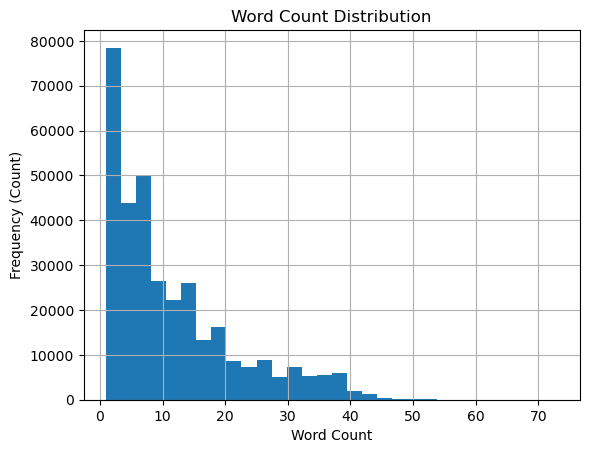

In [14]:
import matplotlib.pyplot as plt
new_df['Word_Count'].hist(bins=30) 
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency (Count)')
plt.show()